# Ground stations observations

The aim of this notebook is to indicate how to read the data of ground stations. The french network of meteorological ground stations calls RADOME. The time step of data is 6 minutes hence the name 'RADOME6M' in the file names. 
Each file contains 10 to 11 days of 6 minutes data (each month is separated in 3 files) per geographic zone ('NW' for North-West of France and 'SE' for South-East of France). The parameters are as follows:
<ul>
    <li>Metadata of ground stations : number, name, GPS coordinates, height</li>
    <li>Date of the observation</li>
    <li>Precipitation</li>
    <li>Temperatures in the shelter</li>
    <li>Wind</li>    
    <li>Humidity</li>
    <li>Pressure</li>    
</ul>

Remark : the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*
For some distributions, this installation is not sufficient. 
It it is needed to install *basemap-data-hires* doing 
```sh
conda install basemap-data-hires
```

In [1]:
from data_exploration.utils.user_configuration import *

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 
from data_exploration.utils.coordinates_and_projection import *

In [3]:
####Cell containing the modifiable fields######
data_path = path + 'ground_stations/'       #path to the data from ground stations
zone = 'NW'      #study zone
date_i = '20181121'     #start date of the file
date_f = '20181130'     #end date of the file
date = '2018-11-29T06:00:00'    #study date (for the plot example)
param = 'hu'      #study parameter (for the plot example)

In [4]:
complete_path = data_path + zone + '/' + str(date_i[0:4]) + '/' + str(date_i[4:6]) + '/'
file = 'RADOME6M'+'_'+zone+'_'+date_i+'_'+date_f+'.csv'      #file name 

study_date = pd.Timestamp(date)  #study date (for the plot example)

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [5]:
#function to read the csv files
def read_csv(path):
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path,    
              nrows=1).iloc[0].to_dict().items() if 'datetime64[ns]' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'datetime64[ns]' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

In [6]:
#data loading
d = read_csv(complete_path+file)

Data overview :

Parameters about the metadata of ground stations:
<ul>
    <li>number_sta : number of the ground station (number from the original database)</li>
    <li>usual_name : usual name</li>
    <li>lat : latitude into decimal degrees</li>
    <li>lon : longitude into decimal degrees</li>    
    <li>height_sta : height into meters</li>    
</ul>
Then, the date parameter is a datetime object with the format 'YYYY-MM-DD HH:mm:ss'.
The meteorological parameters are as follows:
<ul>
    <li>dd : wind direction into degrees</li>
    <li>ff : wind speed into m.s<sup>-1</sup></li>
    <li>precip : precipitation during the reporting period into kg.m<sup>2</sup></li>
    <li>hu : humidity into %</li>    
    <li>td : dew point temperature into Kelvin</li> 
    <li>t : temperature into Kelvin</li> 
    <li>psl : pressure reduced to sea level into Pa</li>    
</ul>

In [7]:
d

,number_sta,usual_name,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,BERNIERES,49.33400,-0.43067,2.0,2018-11-21 00:00:00,170.0,2.8,0.0,94.0,273.55,274.45,NaN
1,14126001,NaN,49.14550,0.04183,125.0,2018-11-21 00:00:00,NaN,NaN,0.0,99.0,272.75,272.85,NaN
2,14137001,CAEN-CARPIQUET,49.18000,-0.45617,67.0,2018-11-21 00:00:00,120.0,2.7,0.0,96.0,271.15,271.75,100580.0
3,14216001,DAMBLAINVILLE,48.92800,-0.14867,155.0,2018-11-21 00:00:00,160.0,2.3,0.0,96.0,271.75,272.35,NaN
4,14296001,NaN,48.79467,-1.03716,336.0,2018-11-21 00:00:00,NaN,NaN,0.0,NaN,NaN,272.45,NaN
5,14357002,NaN,48.92650,-0.69250,223.0,2018-11-21 00:00:00,NaN,NaN,0.0,NaN,NaN,270.85,NaN
6,14366002,NaN,49.16500,0.22700,62.0,2018-11-21 00:00:00,NaN,NaN,0.0,NaN,NaN,272.25,NaN
7,14372001,LIVRY,49.10150,-0.76517,184.0,2018-11-21 00:00:00,210.0,2.2,0.0,92.0,271.85,272.95,NaN
8,14501002,NaN,48.88983,-0.38600,185.0,2018-11-21 00:00:00,NaN,NaN,0.0,NaN,NaN,272.65,NaN
9,14515001,NaN,49.34917,-0.77267,74.0,2018-11-21 00:00:00,180.0,5.0,NaN,NaN,NaN,NaN,NaN


Types of data :

In [8]:
d.dtypes

number_sta          category
usual_name          category
lat                  float64
lon                  float64
height_sta           float64
date          datetime64[ns]
dd                   float64
ff                   float64
precip               float64
hu                   float64
td                   float64
t                    float64
psl                  float64
dtype: object

Example : plot a parameter for a given date 

In [9]:
#get the data for the study date
d_sub = d[d['date']==study_date]
d_sub

,number_sta,usual_name,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
514158,14066001,BERNIERES,49.33400,-0.43067,2.0,2018-11-29 06:00:00,170.0,7.1,0.0,81.0,280.55,283.65,NaN
514159,14126001,NaN,49.14550,0.04183,125.0,2018-11-29 06:00:00,NaN,NaN,0.0,83.0,280.55,283.35,NaN
514160,14137001,CAEN-CARPIQUET,49.18000,-0.45617,67.0,2018-11-29 06:00:00,170.0,9.3,0.2,87.0,280.75,282.85,100750.0
514161,14216001,DAMBLAINVILLE,48.92800,-0.14867,155.0,2018-11-29 06:00:00,190.0,5.9,0.2,79.0,279.25,282.75,NaN
514162,14357002,NaN,48.92650,-0.69250,223.0,2018-11-29 06:00:00,NaN,NaN,0.0,NaN,NaN,281.35,NaN
514163,14366002,NaN,49.16500,0.22700,62.0,2018-11-29 06:00:00,NaN,NaN,0.0,NaN,NaN,283.95,NaN
514164,14372001,LIVRY,49.10150,-0.76517,184.0,2018-11-29 06:00:00,170.0,6.3,0.0,93.0,281.05,282.15,NaN
514165,14501002,NaN,48.88983,-0.38600,185.0,2018-11-29 06:00:00,NaN,NaN,0.0,NaN,NaN,281.75,NaN
514166,14515001,NaN,49.34917,-0.77267,74.0,2018-11-29 06:00:00,170.0,6.7,NaN,NaN,NaN,NaN,NaN
514167,14577003,NaN,49.27967,-0.56383,15.0,2018-11-29 06:00:00,NaN,NaN,0.0,90.0,281.55,283.15,NaN


<IPython.core.display.Javascript object>


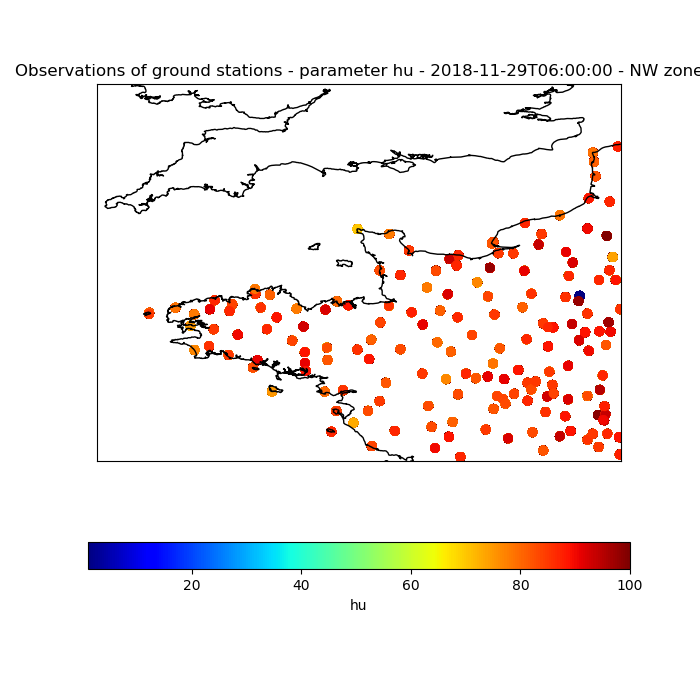

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


In [10]:
#plot the data
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
x,y = m(d['lon'],d['lat'])
m.scatter(x,y,c=d[param],cmap='jet')

plt.colorbar(orientation= 'horizontal').set_label(param)

plt.title("Observations of ground stations - parameter "+param+" - "+ str(date) +" - "+zone+" zone")
plt.show()